In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [45]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.20.3.


In [5]:
df = pd.read_csv("https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [8]:
num_rows = df.shape[0]
print(num_rows)

19622


In [10]:
#removing useless data, counting missing elements (NaN)
counter_nan = df.isnull().sum()
counter_without_nan = counter_nan[counter_nan==0]
print("total NaN {} \n total without NaN {} ".format(counter_nan, counter_without_nan))

total NaN Unnamed: 0                     0
user_name                      0
raw_timestamp_part_1           0
raw_timestamp_part_2           0
cvtd_timestamp                 0
new_window                     0
num_window                     0
roll_belt                      0
pitch_belt                     0
yaw_belt                       0
total_accel_belt               0
kurtosis_roll_belt         19216
kurtosis_picth_belt        19216
kurtosis_yaw_belt          19216
skewness_roll_belt         19216
skewness_roll_belt.1       19216
skewness_yaw_belt          19216
max_roll_belt              19216
max_picth_belt             19216
max_yaw_belt               19216
min_roll_belt              19216
min_pitch_belt             19216
min_yaw_belt               19216
amplitude_roll_belt        19216
amplitude_pitch_belt       19216
amplitude_yaw_belt         19216
var_total_accel_belt       19216
avg_roll_belt              19216
stddev_roll_belt           19216
var_roll_belt              19216


In [12]:
pd.__version__

'0.24.2'

In [13]:
#removing columns with missing elements
df2 = df[counter_without_nan.keys()]

In [14]:
df2.shape

(19622, 60)

In [15]:
df.shape

(19622, 160)

In [16]:
df2.head()

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [17]:
#removing the first 7 columns with no useful info
df2 = df2.ix[:,7:]
df2.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1.41,8.07,-94.4,3,0.00,0.00,-0.02,-21,4,22,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,1.41,8.07,-94.4,3,0.02,0.00,-0.02,-22,4,22,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,1.42,8.07,-94.4,3,0.00,0.00,-0.02,-20,5,23,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,1.48,8.05,-94.4,3,0.02,0.00,-0.03,-22,3,21,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,24,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A


In [18]:
columns = df2.columns
print (columns)

Index(['roll_belt', 'pitch_belt', 'yaw_belt', 'total_accel_belt',
       'gyros_belt_x', 'gyros_belt_y', 'gyros_belt_z', 'accel_belt_x',
       'accel_belt_y', 'accel_belt_z', 'magnet_belt_x', 'magnet_belt_y',
       'magnet_belt_z', 'roll_arm', 'pitch_arm', 'yaw_arm', 'total_accel_arm',
       'gyros_arm_x', 'gyros_arm_y', 'gyros_arm_z', 'accel_arm_x',
       'accel_arm_y', 'accel_arm_z', 'magnet_arm_x', 'magnet_arm_y',
       'magnet_arm_z', 'roll_dumbbell', 'pitch_dumbbell', 'yaw_dumbbell',
       'total_accel_dumbbell', 'gyros_dumbbell_x', 'gyros_dumbbell_y',
       'gyros_dumbbell_z', 'accel_dumbbell_x', 'accel_dumbbell_y',
       'accel_dumbbell_z', 'magnet_dumbbell_x', 'magnet_dumbbell_y',
       'magnet_dumbbell_z', 'roll_forearm', 'pitch_forearm', 'yaw_forearm',
       'total_accel_forearm', 'gyros_forearm_x', 'gyros_forearm_y',
       'gyros_forearm_z', 'accel_forearm_x', 'accel_forearm_y',
       'accel_forearm_z', 'magnet_forearm_x', 'magnet_forearm_y',
       'magnet_forea

In [19]:
#get features and scale them
#get x and convert it to numpy array
x = df2.iloc[:,:-1].values #all columns except the last
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

In [20]:
#get class labels and encode it into number
#get class label data
y = df2.iloc[:,-1].values

In [30]:
y[9000:9019]

array(['B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B'], dtype=object)

In [31]:
#encode class labels
class_labels = np.unique(y)

In [32]:
class_labels[:5]

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [33]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y[:5]

array([0, 0, 0, 0, 0])

In [34]:
y[9000]

1

In [35]:
#split the data into training set and test set
test_percentage = 0.1
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=test_percentage, random_state = 0)

In [36]:
#t distributed stochastic neighbor Embedding (t-SNE) visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state = 0)
x_test_2d = tsne.fit_transform(x_test)

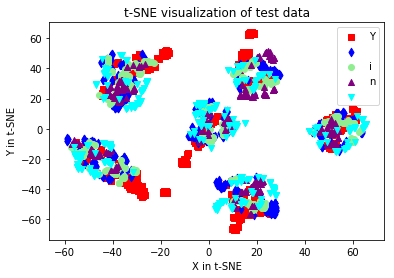

In [44]:
#scatter plot the sample points among 5 classes
markers = ('s','d','o','^','v')
color_map = {0:'red',1:'blue',2:'lightgreen',3:'purple',4:'cyan'}
plt.figure()
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend('Y in t-SNE')
plt.title('t-SNE visualization of test data')
plt.show()

In [43]:
import matplotlib
matplotlib.__version__

'3.0.3'